In [1]:
from pyquil import Program, get_qc
from pyquil.gates import *
from pyquil.quil import DefGate
from pyquil.paulis import exponentiate
from pyquil.paulis import PauliSum
from pyquil.paulis import PauliTerm
import numpy as np
from scipy import linalg
from numpy.linalg import matrix_power
from pyquil.parameters import Parameter, quil_sin, quil_cos
from pyquil.api import WavefunctionSimulator
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
sigma_x=np.array([[0,1],[1,0]])
sigma_y=np.array([[0,-1j],[1j,0]])
sigma_z=np.array([[1,0],[0,-1]])

sigma_x4=np.kron(sigma_x,sigma_x)
wf_sim = WavefunctionSimulator()

# Fig 1

In [3]:
theta = Parameter('theta')
phi = Parameter('phi')

In [4]:
o_4=np.array([[quil_cos(theta),0,0,1j*quil_sin(theta)],
     [0,quil_cos(theta),1j*quil_sin(theta),0],
     [0,1j*quil_sin(theta),quil_cos(theta),0],
     [1j*quil_sin(theta),0,0,quil_cos(theta)]])

O4_definition = DefGate('O_4', o_4, [theta])
O_4 = O4_definition.get_constructor()

## A

In [5]:
Ham=1*np.kron(np.eye(2),sigma_z)+np.kron(sigma_z,np.eye(2))+2*np.kron(sigma_x,sigma_x)
Ket00=np.array([1,0,0,0]).reshape(4,1)

In [6]:
thetas = np.linspace(0,1.5*np.pi,1000)
probs=[]
for theta in thetas:
    probs.append(abs(np.matmul(linalg.expm(-1j*Ham*theta),Ket00)[0,0])**2)

### i. 

In [7]:
Z_term_1=PauliTerm('Z',0,np.pi/(4*np.sqrt(2)))
Z_term_2=PauliTerm('Z',1,np.pi/(4*np.sqrt(2)))

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

p = Program()
probs_1ai=[1]
p += O4_definition

for i in range (5):
    
    p += O_4(np.pi/(2*np.sqrt(2)))(0, 1)
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    probs_1ai.append(abs(wavefunction[0])**2)



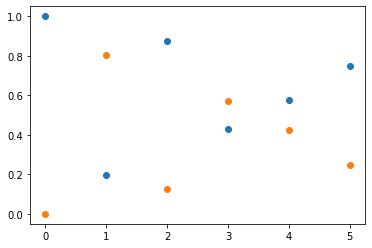

In [8]:
plt.plot(probs_1ai,"o")
plt.plot(1-np.array(probs_1ai),"o")


In [9]:
qc = get_qc('2q-qvm')
result = qc.run_and_measure(p, trials=100)
wf_sim = WavefunctionSimulator()
wavefunction = wf_sim.wavefunction(p)
print(abs(wavefunction[0])**2)

0.7502418467190861


### ii

In [10]:
Z_term_1=PauliTerm('Z',0,np.pi/(8*np.sqrt(2)))
Z_term_2=PauliTerm('Z',1,np.pi/(8*np.sqrt(2)))

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

p = Program()
probs_1aii=[1]
p += O4_definition

for i in range (10):
    
    p += O_4(np.pi/(4*np.sqrt(2)))(0, 1)
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    probs_1aii.append(abs(wavefunction[0])**2)



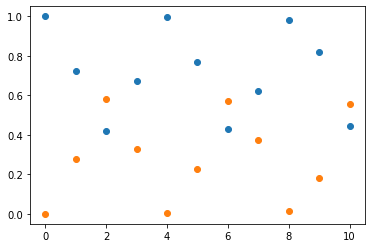

In [11]:
plt.plot(probs_1aii,"o")
plt.plot(1-np.array(probs_1aii),"o")


### iii

In [12]:
Z_term_1=PauliTerm('Z',0,np.pi/(12*np.sqrt(2)))
Z_term_2=PauliTerm('Z',1,np.pi/(12*np.sqrt(2)))

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

p = Program()
probs_1aiii=[1]

for i in range (15):
    p += O4_definition
    p += O_4(np.pi/(6*np.sqrt(2)))(0, 1)
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    probs_1aiii.append(abs(wavefunction[0])**2)


/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/pyquil/quil.py:183: UserWarning: Gate O_4 has already been defined in this program
  .format(instruction.name))


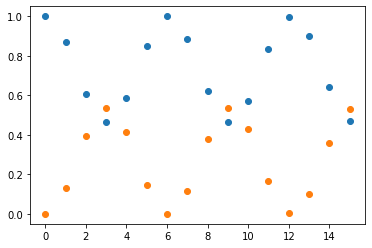

In [13]:
plt.plot(probs_1aiii,"o")
plt.plot(1-np.array(probs_1aiii),"o")


### iv

In [14]:
Z_term_1=PauliTerm('Z',0,np.pi/(16*np.sqrt(2)))
Z_term_2=PauliTerm('Z',1,np.pi/(16*np.sqrt(2)))

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

p = Program()
probs_1aiv=[1]
p += O4_definition

for i in range (21):
    
    p += O_4(np.pi/(8*np.sqrt(2)))(0, 1)
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    probs_1aiv.append(abs(wavefunction[0])**2)


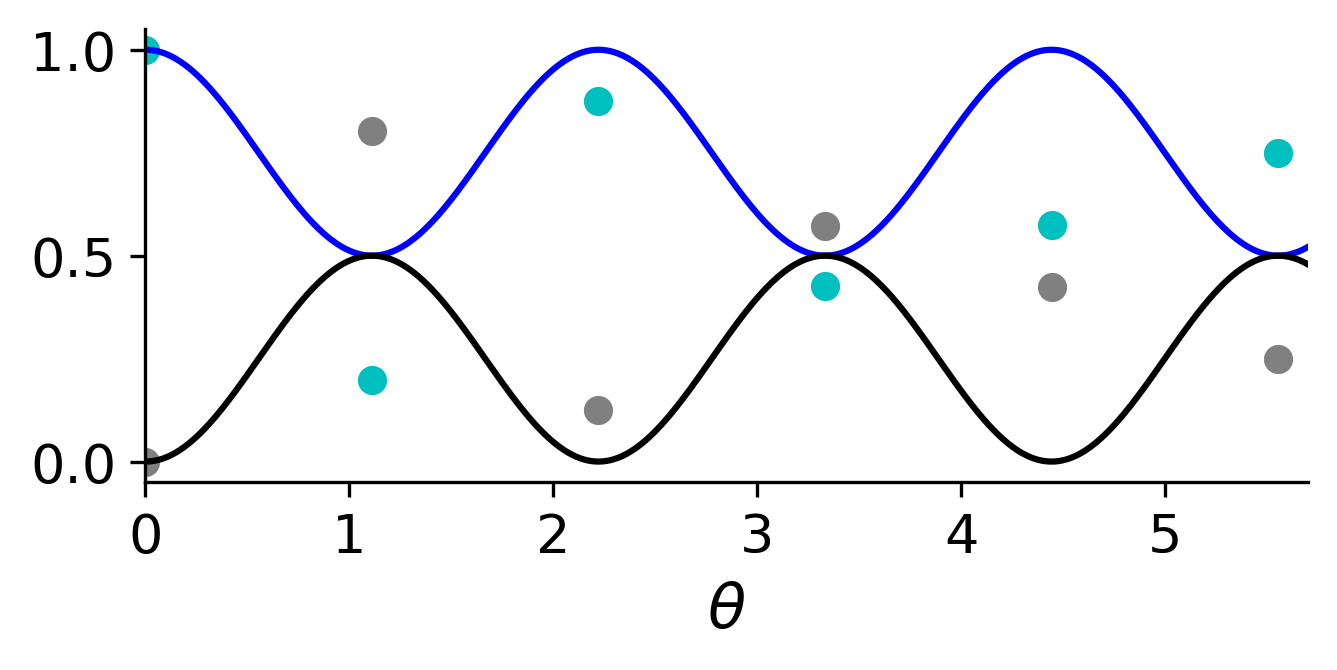

In [102]:
plt.figure(figsize=(5,2),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,0.5,1])
ax.tick_params(axis='both', labelsize=13) 

step=np.pi/(1*2*np.sqrt(2))
thetas2 = np.arange(0,6*step,np.pi/(1*2*np.sqrt(2)))
plt.plot(thetas2,probs_1ai,"o",c='c')
plt.plot(thetas2,1-np.array(probs_1ai),"o",c='gray')
plt.plot(thetas1,probs,c='b')
plt.plot(thetas1,1-np.array(probs),c='k')
plt.xlim(0,5.7)
plt.xlabel(r'$\theta$', fontsize=15)

plt.savefig('trotter1.pdf',bbox_inches = 'tight',pad_inches = 0)




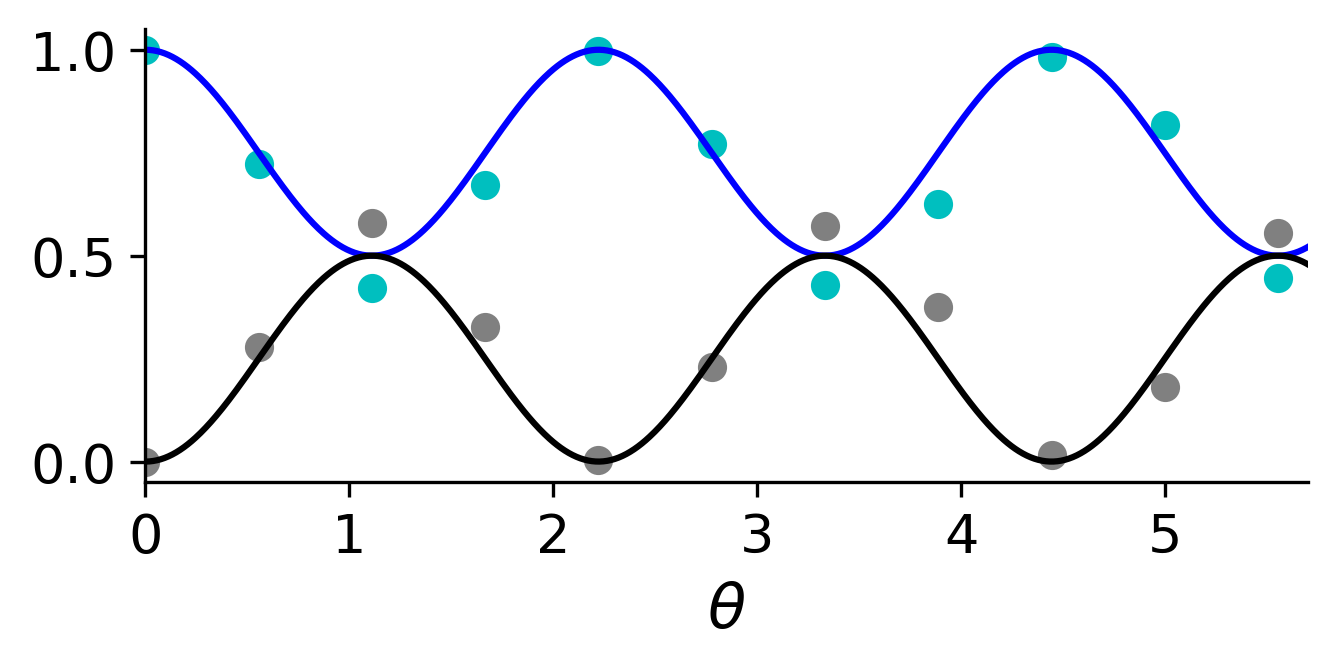

In [103]:
plt.figure(figsize=(5,2),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,0.5,1])
ax.tick_params(axis='both', labelsize=13)  

step=np.pi/(2*2*np.sqrt(2))
thetas2 = np.arange(0,11*step,np.pi/(2*2*np.sqrt(2)))
plt.plot(thetas2,probs_1aii,"o",c='c')
plt.plot(thetas2,1-np.array(probs_1aii),"o",c='gray')
plt.plot(thetas1,probs,c='b')
plt.plot(thetas1,1-np.array(probs),c='k')

plt.xlim(0,5.7)

plt.xlabel(r'$\theta$', fontsize=15)

plt.savefig('trotter2.pdf',bbox_inches = 'tight',pad_inches = 0)


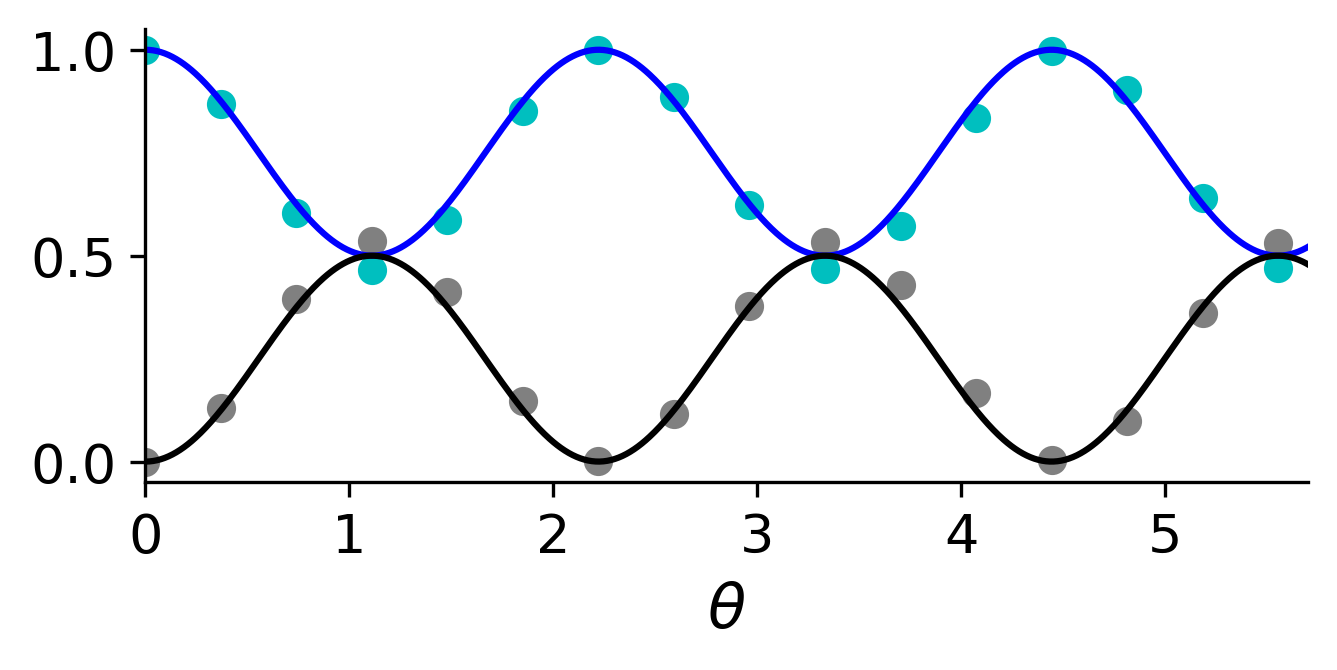

In [104]:
plt.figure(figsize=(5,2),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,0.5,1])
ax.tick_params(axis='both', labelsize=13) 

step=np.pi/(3*2*np.sqrt(2))
thetas2 = np.arange(0,16*step,np.pi/(3*2*np.sqrt(2)))
plt.plot(thetas2,probs_1aiii,"o",c='c')
plt.plot(thetas2,1-np.array(probs_1aiii),"o",c='gray')
plt.plot(thetas1,probs,c='b')
plt.plot(thetas1,1-np.array(probs),c='k')

plt.xlim(0,5.7)

plt.xlabel(r'$\theta$', fontsize=15)

plt.savefig('trotter3.pdf',bbox_inches = 'tight',pad_inches = 0)


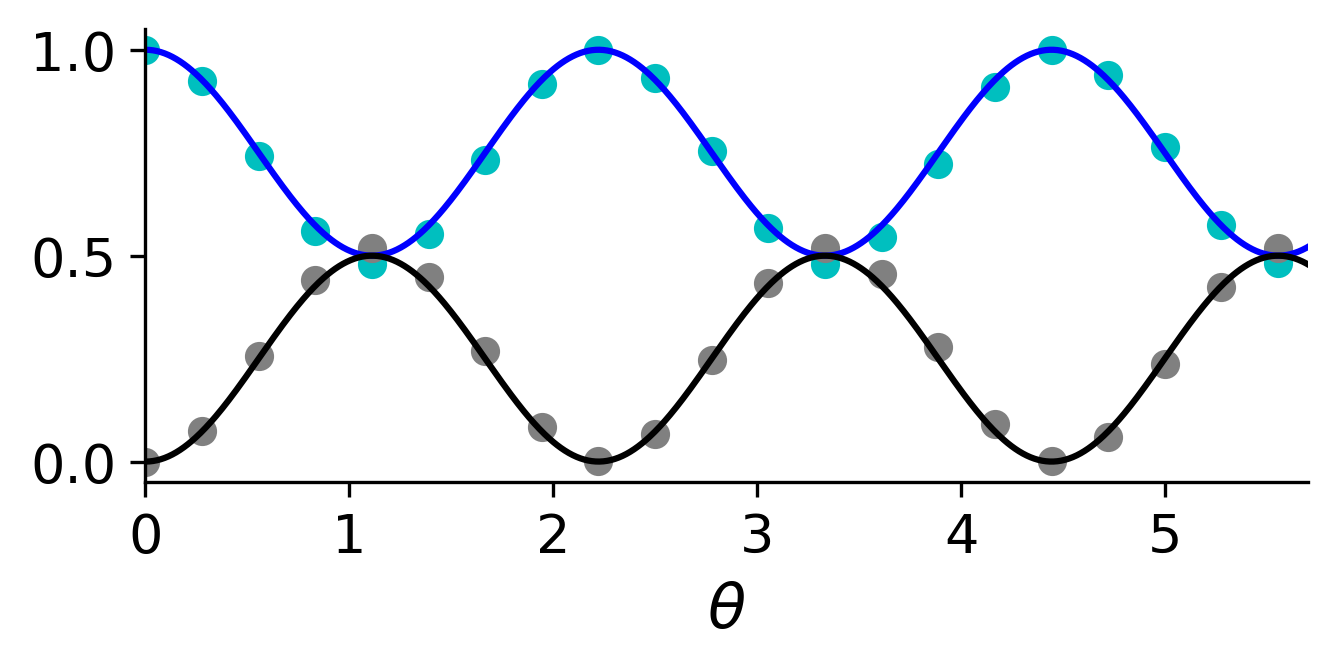

In [105]:
plt.figure(figsize=(5,2),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,0.5,1])
ax.tick_params(axis='both', labelsize=13)

step=np.pi/(4*2*np.sqrt(2))
thetas2 = np.arange(0,22*step,np.pi/(4*2*np.sqrt(2)))
plt.plot(thetas2,probs_1aiv,"o",c='c')
plt.plot(thetas2,1-np.array(probs_1aiv),"o",c='gray')
plt.plot(thetas1,probs,c='b')
plt.plot(thetas1,1-np.array(probs),c='k')
plt.xlim(0,5.7)
plt.xlabel(r'$\theta$', fontsize=15)

plt.savefig('trotter4.pdf',bbox_inches = 'tight',pad_inches = 0)




In [106]:
thetas1 = np.linspace(0,2*np.pi,1000)
probs=[]
for theta in thetas1:
    probs.append(abs(np.matmul(linalg.expm(-1j*Ham*theta/2),Ket00)[0,0])**2)

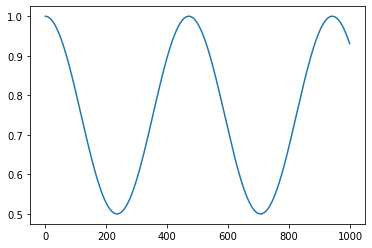

In [45]:
plt.plot(probs)

In [28]:
thetas

array([0.        , 0.11107207, 0.22214415, 0.33321622, 0.44428829,
       0.55536037, 0.66643244, 0.77750451, 0.88857659, 0.99964866,
       1.11072073, 1.22179281, 1.33286488, 1.44393695, 1.55500903,
       1.6660811 , 1.77715318, 1.88822525, 1.99929732, 2.1103694 ,
       2.22144147, 2.33251354, 2.44358562, 2.55465769, 2.66572976,
       2.77680184, 2.88787391, 2.99894598, 3.11001806, 3.22109013,
       3.3321622 , 3.44323428, 3.55430635, 3.66537842, 3.7764505 ,
       3.88752257, 3.99859464, 4.10966672, 4.22073879, 4.33181086,
       4.44288294, 4.55395501, 4.66502709])

## B

In [20]:
Z_term_1=PauliTerm('Z',0,np.pi/16)
Z_term_2=PauliTerm('Z',1,np.pi/16)

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

p = Program()
wave_func=[]
p += O4_definition
p+=X(0)
p+=X(1)
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#1
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#2
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#3
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#4
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21

wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#5
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#6
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#7
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21

wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)
#8
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_4(np.pi/16)(0, 1)
p += O_20
p += O_21
wavefunction = wf_sim.wavefunction(p)
wave_func.append(wavefunction)



In [21]:
print(abs(1/2*wave_func[6][0]+1/2*wave_func[6][3])**2)

0.4086084690091241


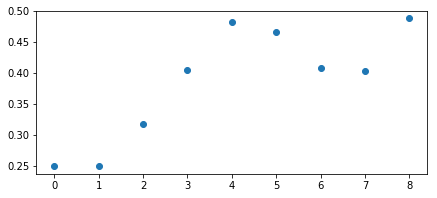

In [22]:
probs_1=[abs(1/2*wave_func[i][0]+1/2*wave_func[i][3])**2 for i in range (0,9)]
probs_2=[abs(1/2*wave_func[i][0]-1/2*wave_func[i][3])**2 for i in range (0,9)]
plt.figure(figsize=(7,3))
plt.plot(probs_1,"o")


In [23]:
print(wave_func[0])
print(wave_func[1])
print(wave_func[8])

(1+0j)|11>
(0.9238795325+0.3826834324j)|11>
(-0.081884004-0.5926601433j)|00> + (-0.1817961394-0.780383962j)|11>


In [24]:
linalg.expm(np.pi/16*1j*sigma_x4)

array([[0.98078528+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.19509032j],
       [0.        +0.j        , 0.98078528+0.j        ,
        0.        +0.19509032j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.19509032j,
        0.98078528+0.j        , 0.        +0.j        ],
       [0.        +0.19509032j, 0.        +0.j        ,
        0.        +0.j        , 0.98078528+0.j        ]])

In [25]:
def hamiltonian_1B(J):
    Ham=np.kron(np.eye(2),sigma_z)+np.kron(sigma_z,np.eye(2))+J*np.kron(sigma_x,sigma_x)
    Ket11=np.array([0,0,0,1]).reshape(4,1)
    time_evolved_ket=np.matmul(linalg.expm(-1j*Ham*np.pi/2),Ket11)
    proj=np.array([1/2,1/2,1/2,1/2]).reshape(1,4)
    resp=abs(np.matmul(proj,time_evolved_ket))**2
    return resp[0,0]
    
    

In [26]:
hamiltonian_1B(3)

0.1721794739266128

# Fig 2

In [27]:
theta = Parameter('theta')
phi = Parameter('phi')

In [28]:
o_4=np.array([[quil_cos(theta),0,0,1j*quil_sin(theta)],
     [0,quil_cos(theta),1j*quil_sin(theta),0],
     [0,1j*quil_sin(theta),quil_cos(theta),0],
     [1j*quil_sin(theta),0,0,quil_cos(theta)]])

O4_definition = DefGate('O_4', o_4, [theta])
O_4 = O4_definition.get_constructor()

o_4_pi2=np.array([[quil_cos(theta),0,0,-1j*quil_sin(theta)],
     [0,quil_cos(theta),1j*quil_sin(theta),0],
     [0,1j*quil_sin(theta),quil_cos(theta),0],
     [-1j*quil_sin(theta),0,0,quil_cos(theta)]])

O4_pi2_definition = DefGate('O_4_pi2', o_4_pi2, [theta])
O_4_pi2 = O4_pi2_definition.get_constructor()

## a

In [29]:
Z_term_1=PauliTerm('Z',0,np.pi/16)
Z_term_2=PauliTerm('Z',1,np.pi/16)

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

wave_func_2a=[]

p = Program()

p += O4_definition
p += H(0)
p += X(1)
p += H(1)

wavefunction = wf_sim.wavefunction(p)
wave_func_2a.append(wavefunction)

for i in range (12):    
    
    
    p += O_4(np.pi/16)(0, 1)
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    wave_func_2a.append(wavefunction)


In [30]:
probs_1=[abs(1/2*wave_func_2a[i][0]+
             1/2*wave_func_2a[i][1]-
             1/2*wave_func_2a[i][2]-
             1/2*wave_func_2a[i][3])**2 for i in range (0,12)]
probs_2=[abs(1/2*wave_func_2a[i][0]-
             1/2*wave_func_2a[i][1]+
             1/2*wave_func_2a[i][2]-
             1/2*wave_func_2a[i][3])**2 for i in range (0,12)]
probs_3=[abs(1/2*wave_func_2a[i][0]-
             1/2*wave_func_2a[i][1]-
             1/2*wave_func_2a[i][2]+
             1/2*wave_func_2a[i][3])**2 for i in range (0,12)]

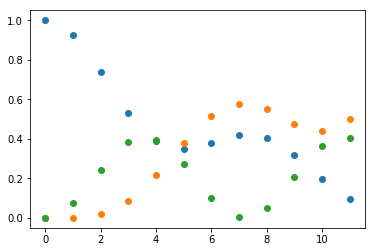

In [31]:
plt.plot(probs_1,"o")
plt.plot(probs_2,"o")
plt.plot(2*np.array(probs_3),"o")

In [32]:
sigma_x_pi=np.array([[0,-1],[-1,0]])


sigma_x4_pi=np.kron(sigma_x_pi,sigma_x_pi)

In [33]:
sigma_x4_pi

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [34]:
sigma_y4=np.kron(sigma_y,sigma_y)

In [35]:
sigma_y4

array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

## B

In [36]:
Z_term_1=PauliTerm('Z',0,np.pi/16)
Z_term_2=PauliTerm('Z',1,np.pi/16)

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

wave_func_2b=[]

p = Program()

p += O4_definition
p += O4_pi2_definition
p += H(0)
p += X(1)
p += H(1)

wavefunction = wf_sim.wavefunction(p)
wave_func_2b.append(wavefunction)

for i in range (13):    
    
    p += O_4_pi2(np.pi/16)(0, 1)
    
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(0, 1)
    
    p += O_20
    p += O_21
    wavefunction = wf_sim.wavefunction(p)
    wave_func_2b.append(wavefunction)


In [37]:
probs_1=[abs(1/2*wave_func_2b[i][0]+
             1/2*wave_func_2b[i][1]-
             1/2*wave_func_2b[i][2]-
             1/2*wave_func_2b[i][3])**2 for i in range (0,12)]
probs_2=[abs(1/2*wave_func_2b[i][0]-
             1/2*wave_func_2b[i][1]+
             1/2*wave_func_2b[i][2]-
             1/2*wave_func_2b[i][3])**2 for i in range (0,12)]
probs_3=[abs(1/2*wave_func_2b[i][0]-
             1/2*wave_func_2b[i][1]-
             1/2*wave_func_2b[i][2]+
             1/2*wave_func_2b[i][3])**2 for i in range (0,12)]

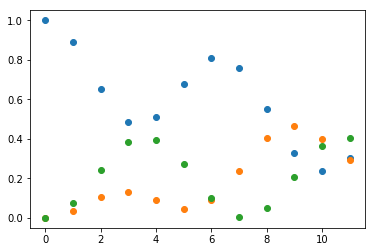

In [38]:
plt.plot(probs_1,"o")
plt.plot(probs_2,"o")
plt.plot(2*np.array(probs_3),"o")

## C

In [39]:
Z_term_1=PauliTerm('Z',0,np.pi/16)
Z_term_2=PauliTerm('Z',1,np.pi/16)

X_term_1=PauliTerm('X',0,np.pi/4)
X_term_2=PauliTerm('X',1,np.pi/4)

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)

O_30=exponentiate(X_term_1)
O_31=exponentiate(X_term_2)

wave_func_2c=[]

p = Program()

p += O4_definition
p += O4_pi2_definition
p += H(0)
p += X(1)
p += H(1)

wavefunction = wf_sim.wavefunction(p)
wave_func_2c.append(wavefunction)

for i in range (13):    
    
    p += O_30
    p += O_31
    p += O_4(np.pi/16)(0, 1)
    p += O_30
    p += O_31
    
    p += O_4_pi2(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(0, 1)
    p += O_20
    p += O_21 

    

    

    
    wavefunction = wf_sim.wavefunction(p)
    wave_func_2c.append(wavefunction)


In [40]:
probs_1=[abs(1/2*wave_func_2c[i][0]+
             1/2*wave_func_2c[i][1]-
             1/2*wave_func_2c[i][2]-
             1/2*wave_func_2c[i][3])**2 for i in range (13)]
probs_2=[abs(1/2*wave_func_2c[i][0]-
             1/2*wave_func_2c[i][1]+
             1/2*wave_func_2c[i][2]-
             1/2*wave_func_2c[i][3])**2 for i in range (13)]
probs_3=[abs(1/2*wave_func_2c[i][0]-
             1/2*wave_func_2c[i][1]-
             1/2*wave_func_2c[i][2]+
             1/2*wave_func_2c[i][3])**2 for i in range (13)]

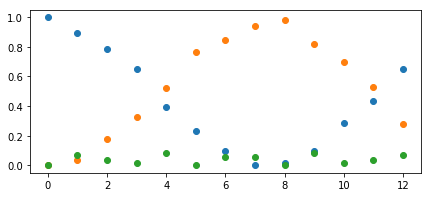

In [41]:
plt.figure(figsize=(7,3))
plt.plot(probs_1,"o")
plt.plot(probs_2,"o")
plt.plot(2*np.array(probs_3),"o")

# Fig 3

In [42]:
theta = Parameter('theta')
phi = Parameter('phi')

In [43]:
o_4=np.array([[quil_cos(theta),0,0,1j*quil_sin(theta)],
     [0,quil_cos(theta),1j*quil_sin(theta),0],
     [0,1j*quil_sin(theta),quil_cos(theta),0],
     [1j*quil_sin(theta),0,0,quil_cos(theta)]])

O4_definition = DefGate('O_4', o_4, [theta])
O_4 = O4_definition.get_constructor()

o_4_pi2=np.array([[quil_cos(theta),0,0,-1j*quil_sin(theta)],
     [0,quil_cos(theta),1j*quil_sin(theta),0],
     [0,1j*quil_sin(theta),quil_cos(theta),0],
     [-1j*quil_sin(theta),0,0,quil_cos(theta)]])

O4_pi2_definition = DefGate('O_4_pi2', o_4_pi2, [theta])
O_4_pi2 = O4_pi2_definition.get_constructor()

## A

In [58]:
Z_term_1=PauliTerm('Z',0,np.pi/32)
Z_term_2=PauliTerm('Z',1,np.pi/32)
Z_term_3=PauliTerm('Z',2,np.pi/32)

O_20=exponentiate(Z_term_1)
O_21=exponentiate(Z_term_2)
O_22=exponentiate(Z_term_3)

wave_func_3a=[]

p = Program()

p += O4_definition
p += X(0)
p += X(1)
p += X(2)

wavefunction = wf_sim.wavefunction(p)
wave_func_3a.append(wavefunction)

for i in range (50):    
    
    
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(1, 2)
    p += O_4(np.pi/16)(0, 2)
    
    p += O_20
    p += O_21 
    p += O_22 
    

    
    wavefunction = wf_sim.wavefunction(p)
    wave_func_3a.append(wavefunction)


In [59]:
probs_1=[abs(wave_func_3a[i][-1])**2 for i in range (50)]
probs_2=[abs(wave_func_3a[i][1])**2 for i in range (50)]

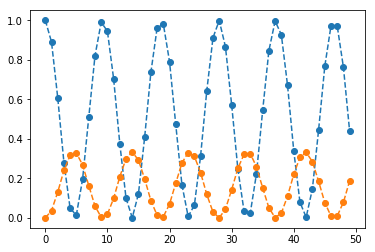

In [61]:
plt.plot(probs_1,"o--")
plt.plot(probs_2,"o--")


## B

In [546]:
Z_term_1=PauliTerm('Z',0,np.pi/2)

O_10=exponentiate(Z_term_1)


wave_func_3b=[]

p = Program()

p += O4_definition
p += X(0)
p += X(1)
p += X(2)

wavefunction = wf_sim.wavefunction(p)
wave_func_3b.append(wavefunction)

for i in range (20):    
    
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(1, 2)
    p += O_4(np.pi/16)(2, 0)
    
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(1, 2)
    p += O_4(np.pi/16)(2, 0)
    
    p += O_10
    
    p += O_4(np.pi/16)(0, 1)
    p += O_4(np.pi/16)(1, 2)
    p += O_4(np.pi/16)(2, 0)
    
    wavefunction = wf_sim.wavefunction(p)
    wave_func_3b.append(wavefunction)


In [547]:
probs_1=[abs(wave_func_3b[i][-1])**2 for i in range (20)]
probs_2=[abs(wave_func_3b[i][1])**2 for i in range (20)]

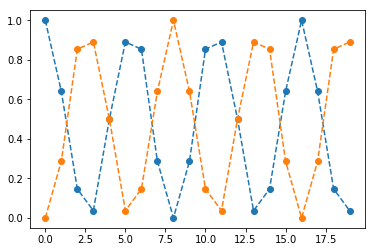

In [548]:
plt.plot(probs_1,"o--")
plt.plot(probs_2,"o--")

In [409]:
print(O_20)

RZ(0.19634954084936207) 0



In [551]:
Z_term_1=PauliTerm('Z',0,-np.pi/4)
O_20=exponentiate(Z_term_1)
print(O_20)

RZ(-pi/2) 0



In [466]:
print(RX(np.pi/2,1))

RX(pi/2) 1


In [516]:

linalg.expm(-1j*np.eye(2)*np.pi)

array([[-1.-1.2246468e-16j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.-1.2246468e-16j]])

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

# Noise experiments

In [238]:
results_noise=[]
for i in range(10):
    noises=np.random.normal(0,i*0.01,100)
    R1=[]
    R2=[]
    waves=[]
    for noise in tqdm_notebook(noises):

        angle1=(np.pi/32)*(1+noise)
        angle2=(np.pi/16)*(1+noise)
        Z_term_1=PauliTerm('Z',0,angle1)
        Z_term_2=PauliTerm('Z',1,angle1)
        Z_term_3=PauliTerm('Z',2,angle1)

        O_20=exponentiate(Z_term_1)
        O_21=exponentiate(Z_term_2)
        O_22=exponentiate(Z_term_3)

        wave_func_3a=[]

        p = Program()

        p += O4_definition
        p += X(0)
        p += X(1)
        p += X(2)

        wavefunction = wf_sim.wavefunction(p)
        wave_func_3a.append(wavefunction)

        for i in range (41):    


            p += O_4(angle2)(0, 1)
            p += O_4(angle2)(1, 2)
            p += O_4(angle2)(0, 2)

            p += O_20
            p += O_21 
            p += O_22 



            wavefunction = wf_sim.wavefunction(p)
            wave_func_3a.append(wavefunction)
        
        waves.append(wave_func_3a)
        #probs_1=[abs(wave_func_3a[i][-1])**2 for i in range (41)]
        #probs_2=[abs(wave_func_3a[i][1])**2 for i in range (41)]

        #R1.append(probs_1)
        #R2.append(probs_2)
    results_noise.append(waves)

In [245]:

ideal_list=results_noise[0]

fids0=[]
for j in range (10):
    fids1=[]
    for k in range (100):
        real=results_noise[j][k]
        fid=[np.abs(ideal_list[k][i].amplitudes@np.conj(real[i].amplitudes))**2 for i in range (41)]
        fids1.append(fid)
    fids0.append(fids1)

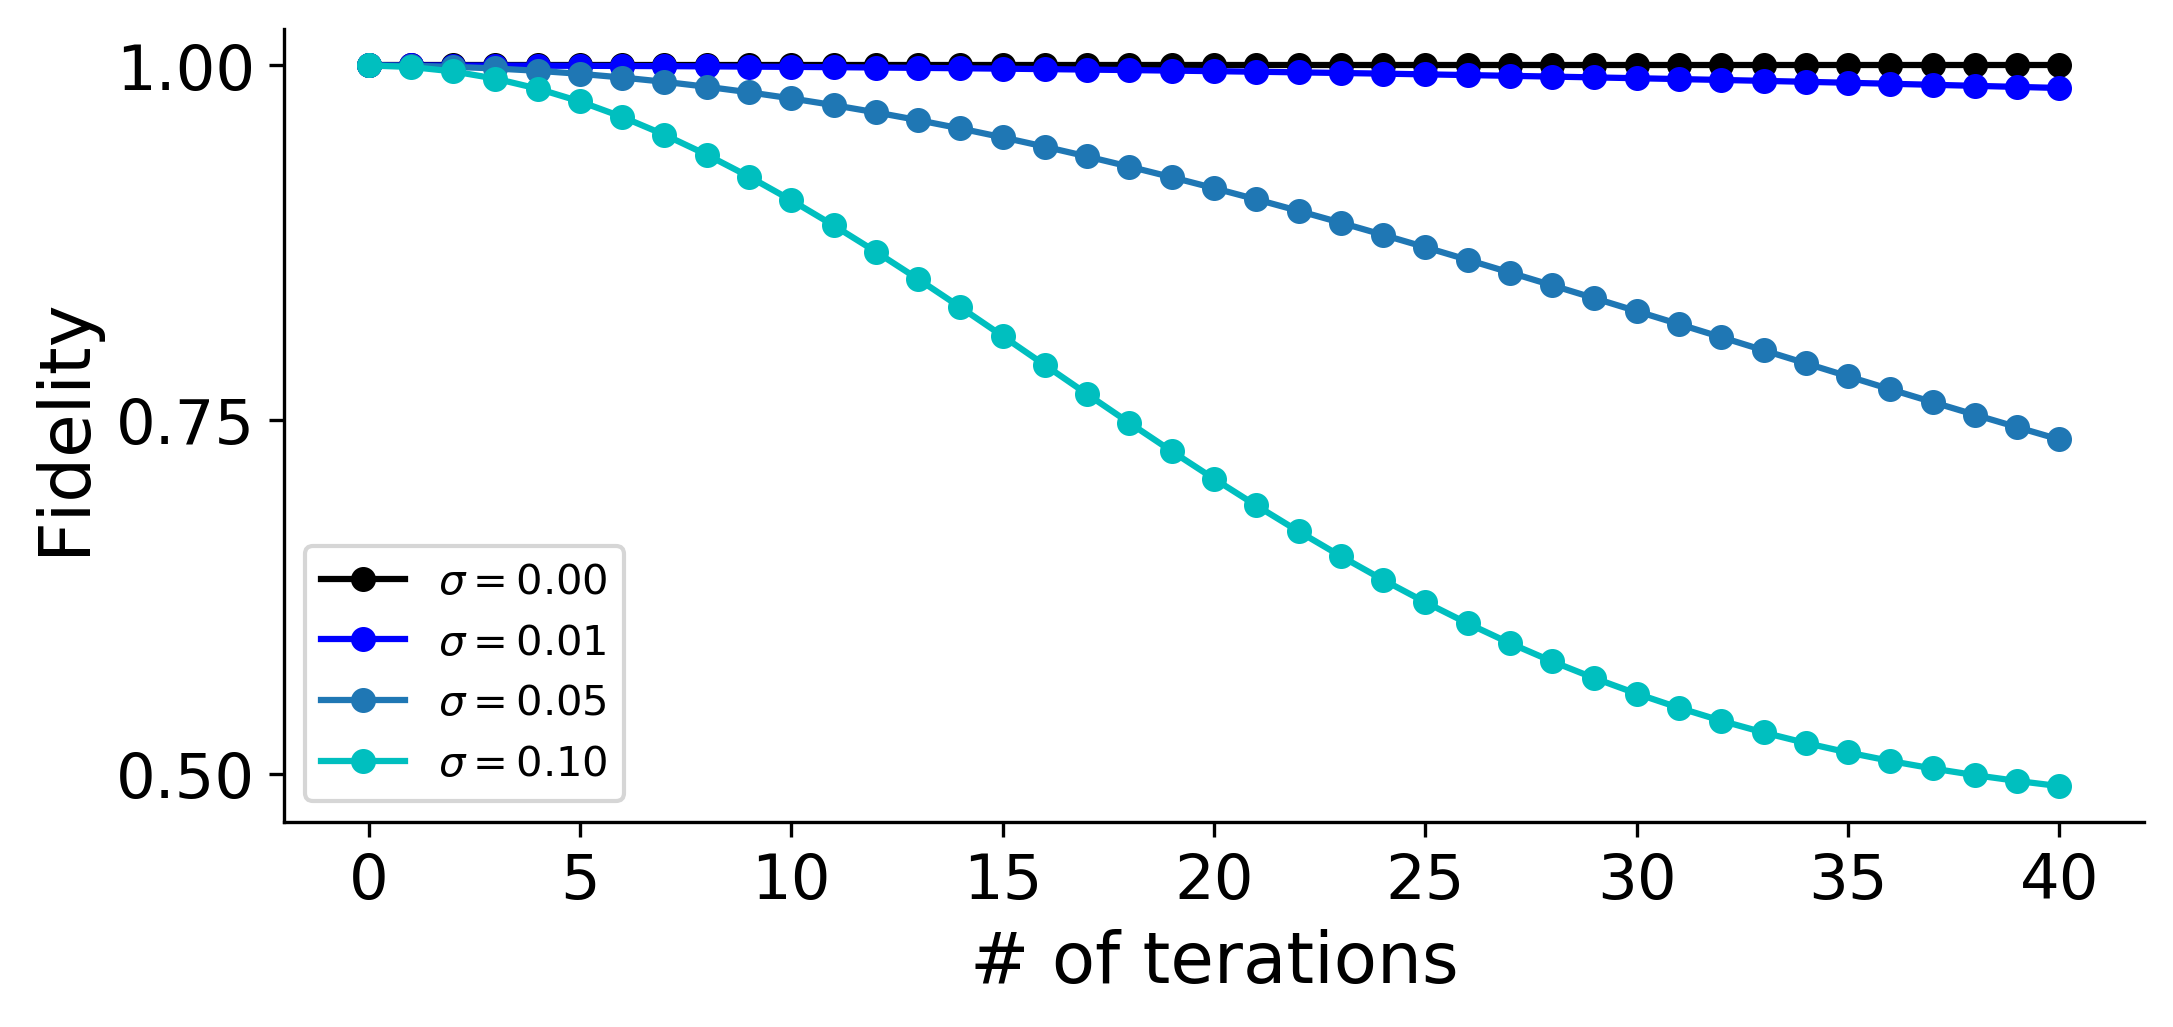

In [397]:
plt.figure(figsize=(8,3.5),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0.5,0.75,1])
ax.tick_params(axis='both', labelsize=15) 

final_fids=np.array(fids0)

final_fids=np.mean(final_fids,axis=1)


plt.ylabel("Fidelity",size=17)
plt.xlabel("# of terations",size=17)
plt.plot(final_fids[0],"o-",c='k',label=r'$\sigma=0.00$',ms=5)
plt.plot(final_fids[1],"o-",c='b',label=r'$\sigma=0.01$',ms=5)
plt.plot(final_fids[5],"o-",label=r'$\sigma=0.05$',ms=5)
plt.plot(final_fids[9],"o-",c='c',label=r'$\sigma=0.10$',ms=5)
plt.legend()

plt.savefig("decayvsgates.pdf",bbox_inches = 'tight',pad_inches = 0)

In [208]:
ideal_list[1].amplitudes

array([ 0.        +0.j        , -0.01875477+0.19042035j,
       -0.01875477+0.19042035j,  0.        +0.j        ,
       -0.01875477+0.19042035j,  0.        +0.j        ,
        0.        +0.j        ,  0.90498687+0.26676547j])

In [167]:
R1_f=np.array(results_noise[0])

results_noisee=np.mean(R1_f,axis=0)
results_std=np.std(R1_f,axis=0)/np.sqrt(100)

ValueError: cannot copy sequence with size 3 to array axis with dimension 8

In [306]:
amps0=[]
for j in range (10):
    amps1=[]
    for k in range (100):
        real=results_noise[j][k]
        amp=[abs(real[i][-1])**2 for i in range (41)]
        amps1.append(amp)
    amps0.append(amps1)

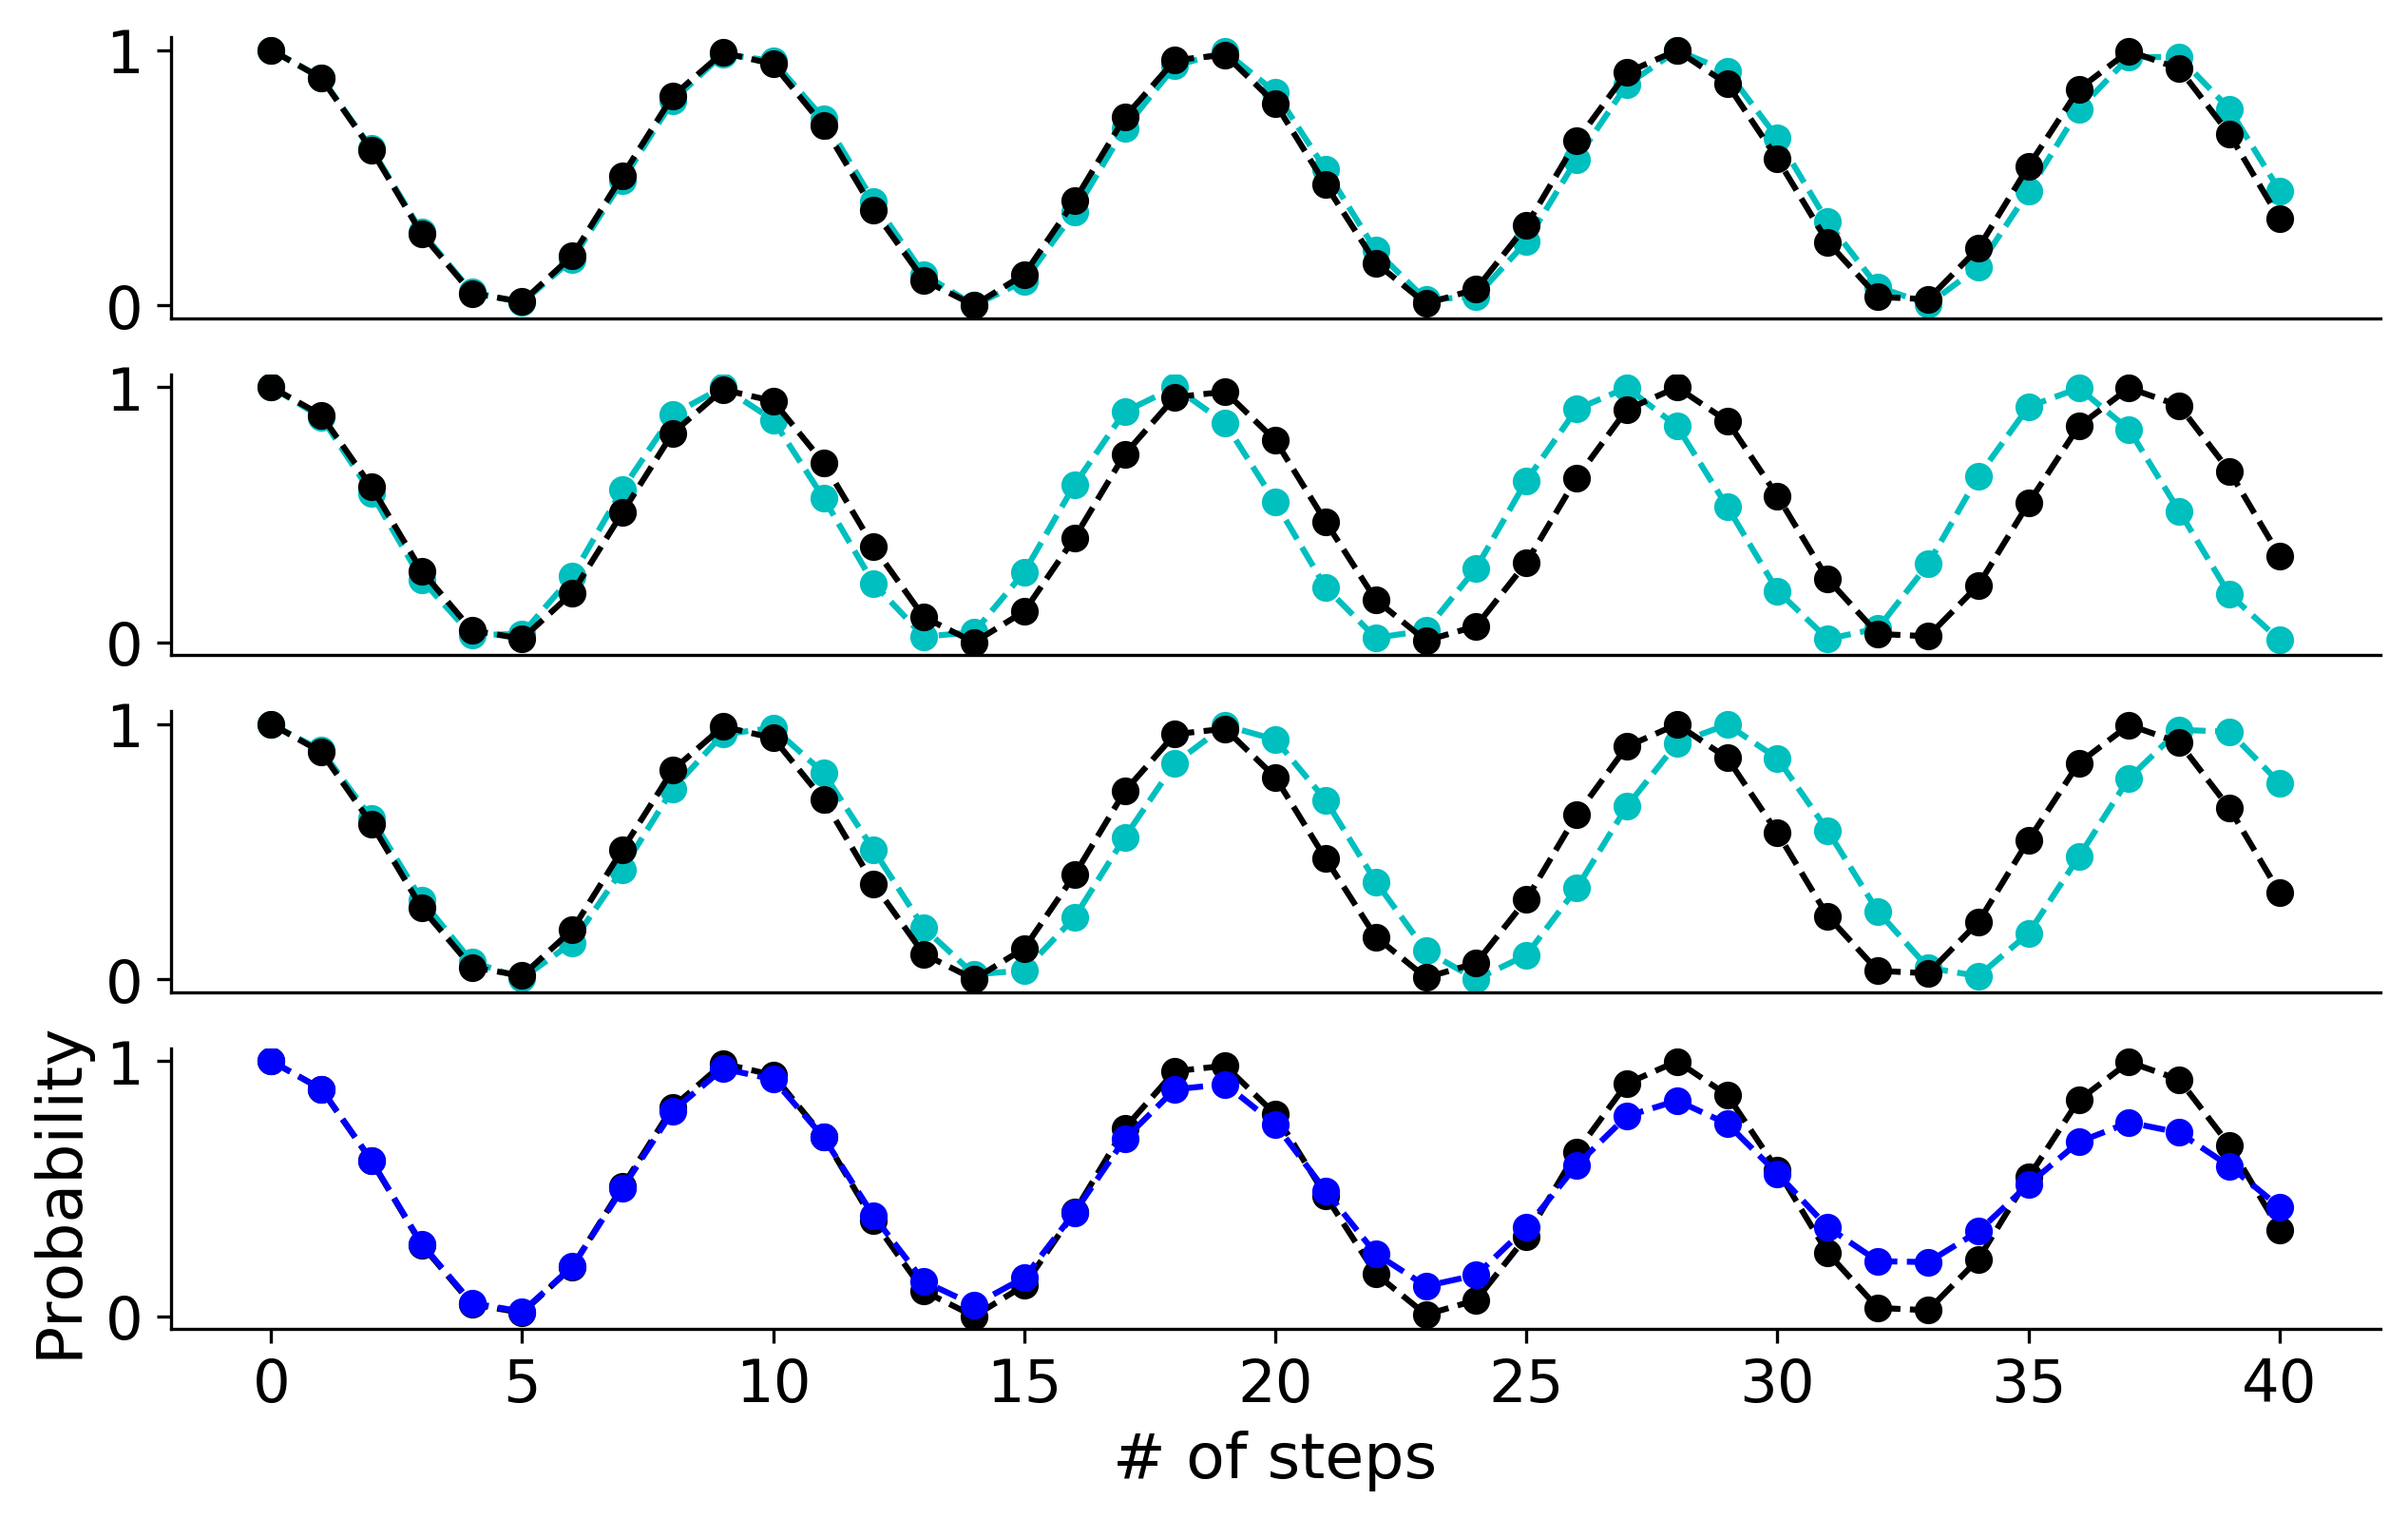

In [375]:
plt.figure(figsize=(10,6),dpi=300)
final_amps=np.array(amps0)
ax = plt.subplot(411)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
#ax.spines["bottom"].set_visible(False) 
ax.set_yticks([0,1])
plt.xticks([], [])
ax.tick_params(axis='both', labelsize=15) 





plt.plot(final_amps[5,10],"o--",c='c')
plt.plot(final_amps[0,20],"o--",c='k')

ax = plt.subplot(412)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
#ax.spines["bottom"].set_visible(False) 
ax.set_yticks([0,1])
ax.tick_params(axis='both', labelsize=15) 
plt.xticks([], [])


plt.plot(final_amps[5,20],"o--",c='c')
plt.plot(final_amps[0,20],"o--",c='k')

ax = plt.subplot(413)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.spines["bottom"].set_visible(False) 
ax.set_yticks([0,1])
plt.xticks([], [])
ax.tick_params(axis='both', labelsize=15) 


plt.plot(final_amps[5,70],"o--",c='c')
plt.plot(final_amps[0,20],"o--",c='k')


ax = plt.subplot(414)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,1])
ax.tick_params(axis='both', labelsize=15) 

plt.plot(final_amps[0,20],"o--",c='k')
plt.plot(np.mean(final_amps,axis=1)[5],"o--",c='b')

plt.ylabel("Probability",size=16)
plt.xlabel("# of steps",size=16)



#plt.figure(figsize=(10,7))
#plt.plot(xss,probs_1,"o-")
#plt.plot(probs_2,"o")

#xss=np.linspace(0,1,41)

#plt.plot(xss,results_noisee,"o")
#plt.errorbar(xss,results_noisee, fmt='o',yerr=results_std)

plt.savefig("threefreq.pdf",bbox_inches = 'tight',pad_inches = 0)

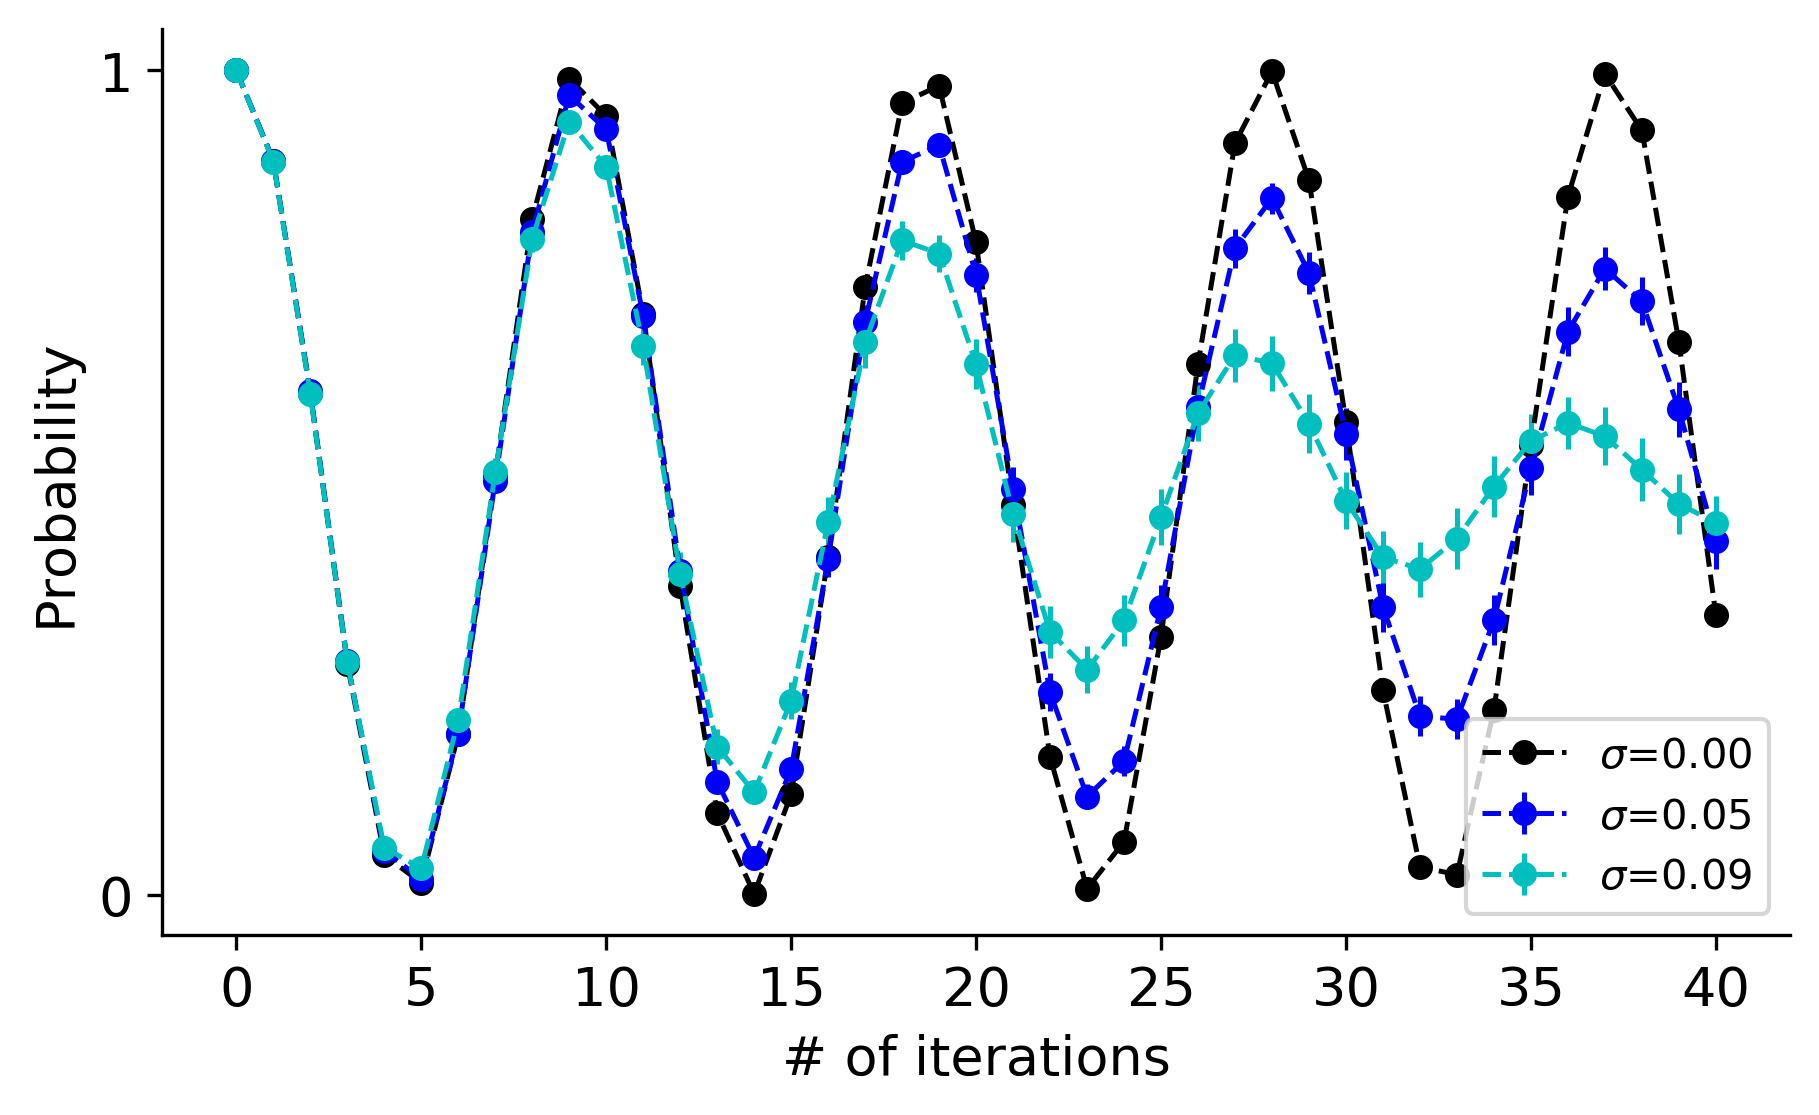

In [411]:
plt.figure(figsize=(7,4),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0,1])
ax.tick_params(axis='both', labelsize=13) 

xs=np.linspace(0,40,41)

plt.plot(final_amps[0,20],"o--",c='k',ms=5,lw=1.2,label=r'$\sigma$=0.00')
plt.errorbar(xs,np.mean(final_amps,axis=1)[5],yerr=np.std(final_amps,axis=1)[5]/10,c='b',fmt='o--',ms=5,lw=1.2,label=r'$\sigma$=0.05')
plt.errorbar(xs,np.mean(final_amps,axis=1)[8],yerr=np.std(final_amps,axis=1)[8]/10,c='c',fmt='o--',ms=5,lw=1.2,label=r'$\sigma$=0.09')
plt.ylabel("Probability",size=13)
plt.xlabel("# of iterations",size=13)
plt.legend()

plt.savefig("decay.pdf",bbox_inches = 'tight',pad_inches = 0)

In [239]:
plt.plot(fids[8])

IndexError: list index out of range

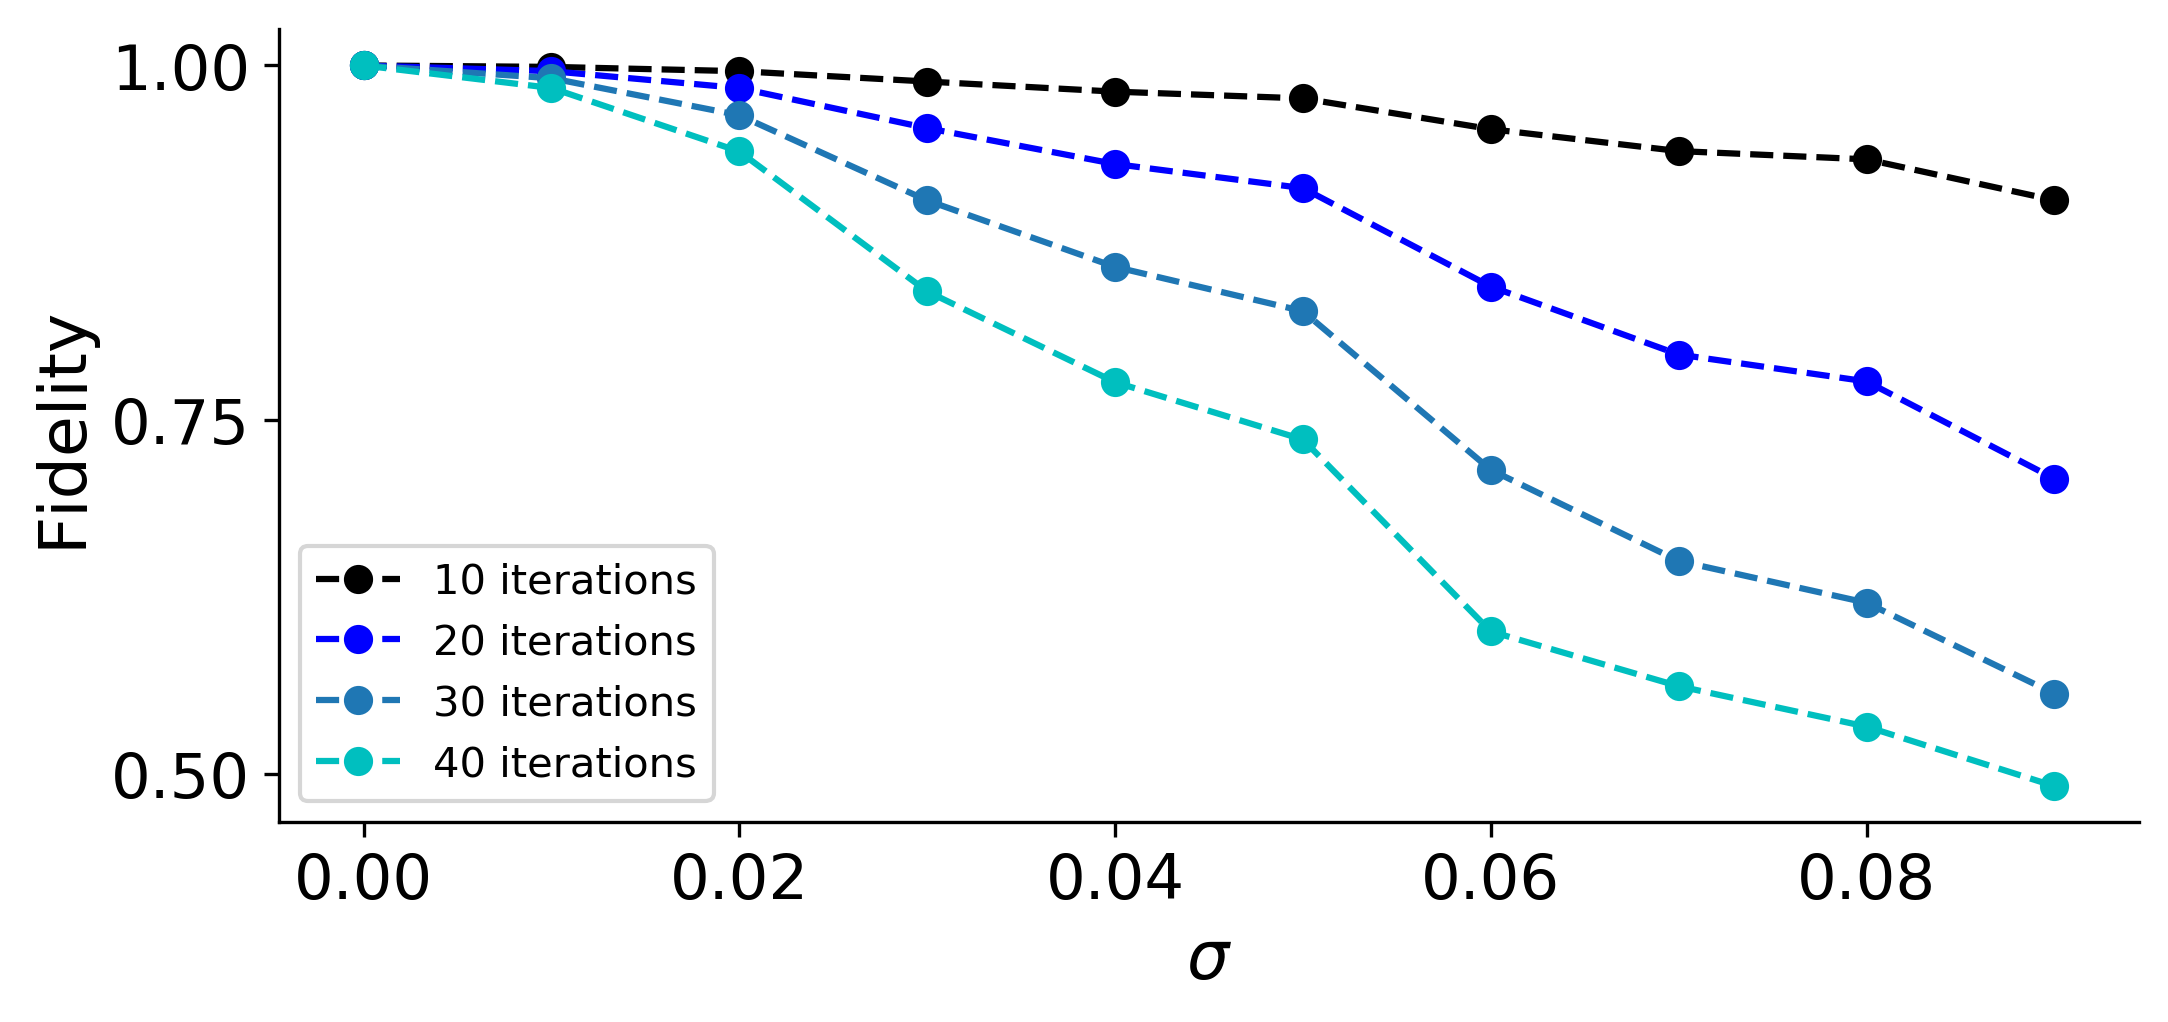

In [408]:
plt.figure(figsize=(8,3.5),dpi=300)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_yticks([0.5,0.75,1])
ax.tick_params(axis='both', labelsize=15) 

sigmasss=0.01*np.linspace(0,9,10)

plt.plot(sigmasss,final_fids[:,10],'o--',c='k',label='10 iterations')
plt.plot(sigmasss,final_fids[:,20],'o--',c='b',label='20 iterations')
plt.plot(sigmasss,final_fids[:,30],'o--',label='30 iterations')
plt.plot(sigmasss,final_fids[:,40],'o--',c='c',label='40 iterations')
plt.xlabel(r'$\sigma$',size=16)
plt.ylabel('Fidelity',size=16)
plt.legend()
plt.savefig('fidsvssigma.pdf',bbox_inches = 'tight',pad_inches = 0)

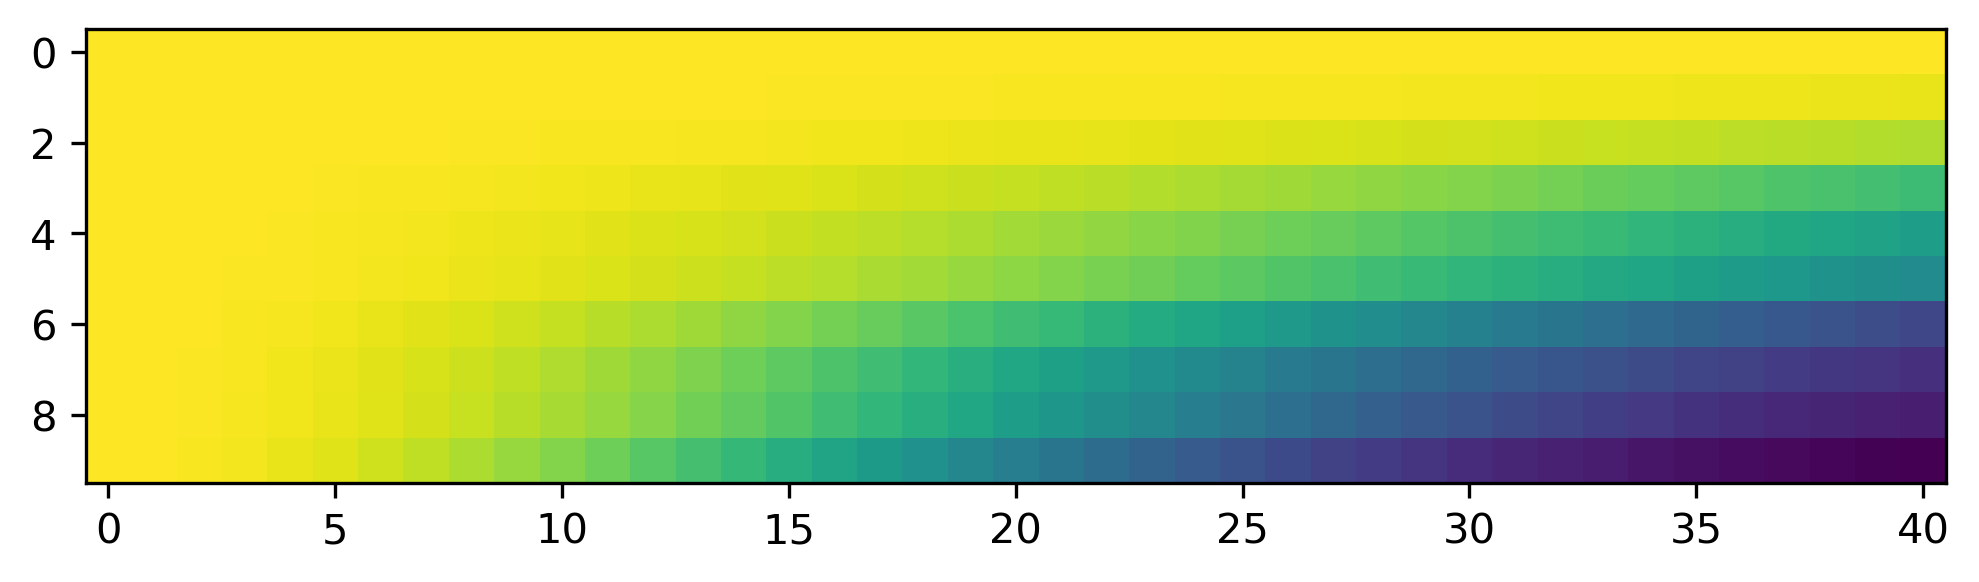

In [406]:
plt.figure(figsize=(8,3.5),dpi=300)

plt.imshow(final_fids)